In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['font.size'] = 15

In [100]:
def get_max_indices(a):
    return np.argwhere(a == np.amax(a)).flatten().tolist()

def value_iteration(n, p):
    v = np.random.randn(n + 1)
    v[0] = 0
    v[n] = 0
    
    # action_map = np.zeros(n + 1)s
    action_map = {}

    for k in range(10000):
        for s in range(1, n):
            action_values = [-100]
            for i in range(1, min(s + 1, n - s + 1)):
                if s + i == n:
                    state_value = p + (1-p) * v[s - i]
                else:
                    state_value = p * v[s + i] + (1-p) * v[s - i]

                action_values.append(state_value)

            v[s] = max(action_values)

            action_values = [round(x, 4) for x in action_values]
    #         action_map[s] = np.argmax(action_values)
            action_map[s] = get_max_indices(action_values)
    
    return v, action_map


def plot_value_function(v, n, p):
    plt.figure(figsize = (15, 10))

    plt_df = pd.DataFrame(
        list(zip(list(range(n)), list(v[:n]))),
        columns = ['state', 'value']
    )

    sns.lineplot(data = plt_df, x = 'state', y = 'value').set_title(f'Value function for p = {p}')


def plot_policy(action_map, n, p):
    plt.figure(figsize = (15, 10))
    policy_actions = [v[0] for k, v in action_map.items()]

    plt_df = pd.DataFrame(
        list(zip(
            list(range(n)), 
            list(policy_actions[:n])
        )),
        columns = ['state', 'action']
    )

    sns.lineplot(data = plt_df, x = 'state', y = 'action').set_title(f'Policy for p = {p}')

In [125]:
def value_iteration_1(n, p):
    v = np.random.randn(n + 1)
    v[0] = 0
    v[n] = 0
    
    action_map = {}

    for k in range(10000):
        for s in range(1, n):
            action_values = [-100]
            for i in range(1, min(s + 1, n - s + 1)):
                if s + i == n:
                    state_value = p + (1-p) * v[s - i]
                else:
                    state_value = p * v[s + i] + (1-p) * v[s - i]

                action_values.append(state_value)

            v[s] = max(action_values)

            action_values = [round(x, 4) for x in action_values]
            action_map[s] = get_max_indices(action_values)
    
    return v, action_map

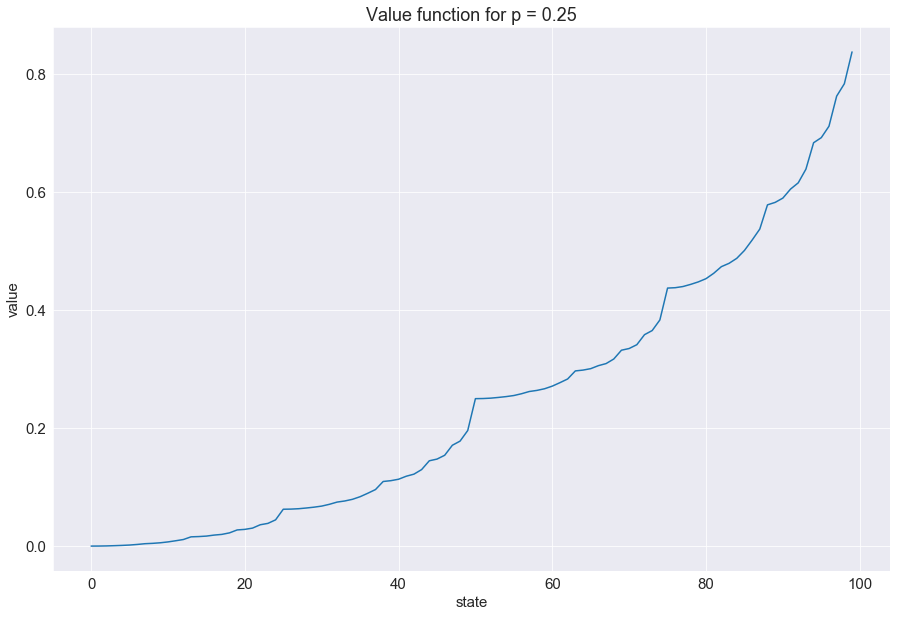

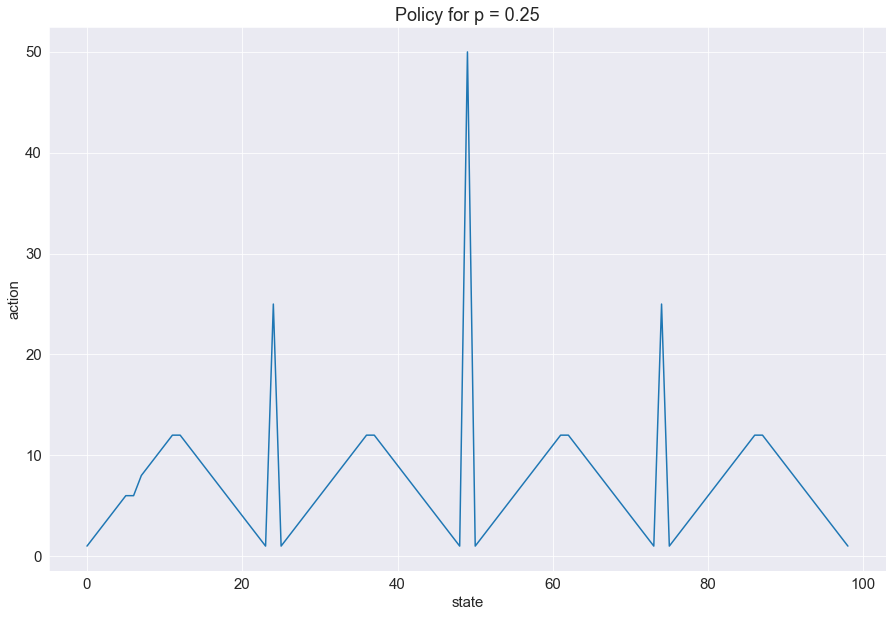

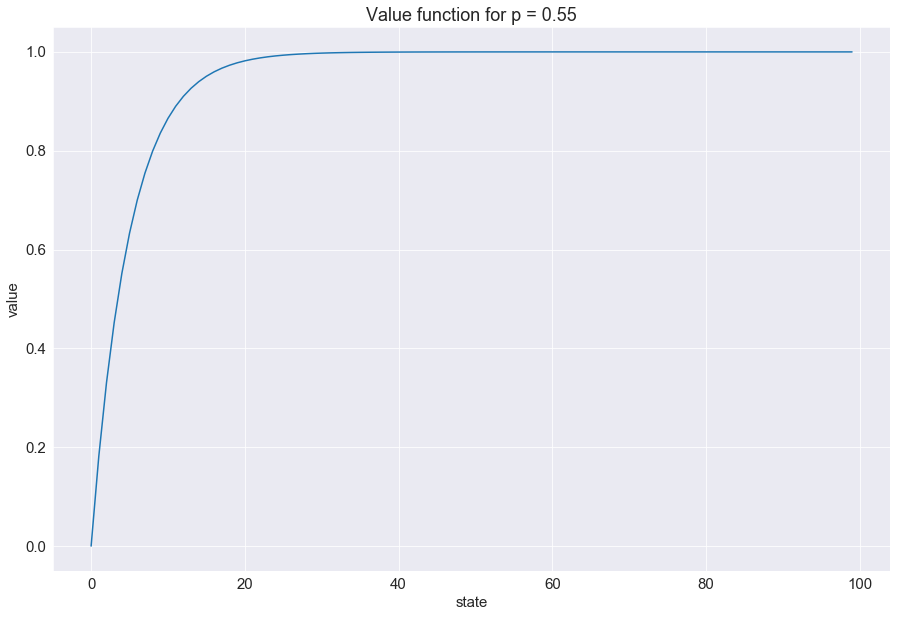

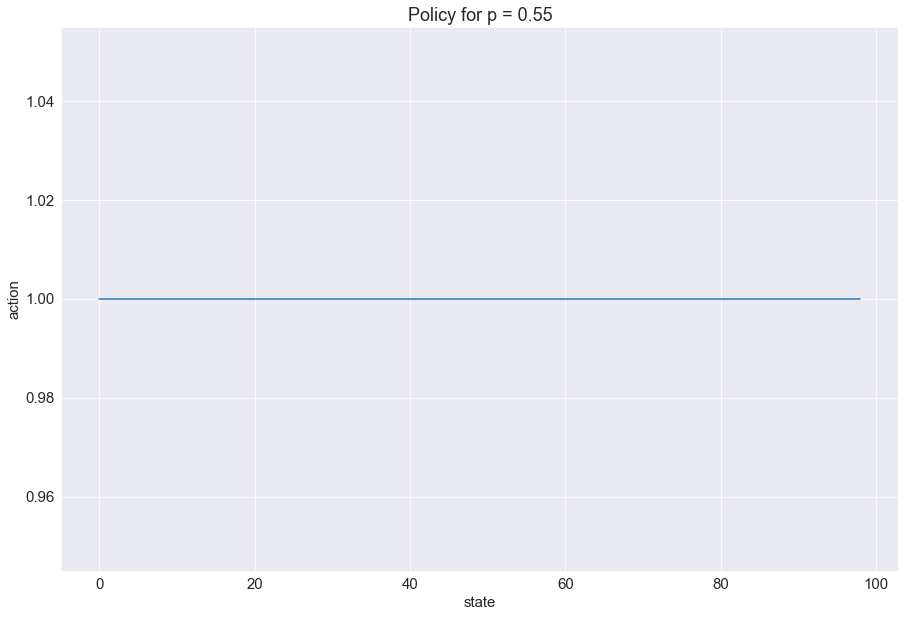

In [101]:
n = 100

for p in [0.25, 0.55]:
    v, action_map = value_iteration(n, p)
    plot_value_function(v, n, p)
    plot_policy(action_map, n, p)

In [102]:
v, action_map = value_iteration(n, 0.4)

In [103]:
action_map

{1: [1],
 2: [2],
 3: [3],
 4: [4],
 5: [5],
 6: [6],
 7: [7],
 8: [8],
 9: [9],
 10: [10],
 11: [11],
 12: [12],
 13: [12, 13],
 14: [11, 14],
 15: [10, 15],
 16: [9, 16],
 17: [8, 17],
 18: [7, 18],
 19: [6, 19],
 20: [5, 20],
 21: [4, 21],
 22: [3, 22],
 23: [2, 23],
 24: [1, 24],
 25: [25],
 26: [1, 24, 26],
 27: [2, 23, 27],
 28: [3, 22, 28],
 29: [4, 21, 29],
 30: [5, 20, 30],
 31: [6, 19, 31],
 32: [7, 18, 32],
 33: [8, 17, 33],
 34: [9, 16, 34],
 35: [10, 15, 35],
 36: [11, 14, 36],
 37: [12, 13, 37],
 38: [12, 38],
 39: [11, 39],
 40: [10, 40],
 41: [9, 41],
 42: [8, 42],
 43: [7, 43],
 44: [6, 44],
 45: [5, 45],
 46: [4, 46],
 47: [3, 47],
 48: [2, 48],
 49: [1, 49],
 50: [50],
 51: [1, 49],
 52: [2, 48],
 53: [3, 47],
 54: [4, 46],
 55: [5, 45],
 56: [6, 44],
 57: [7, 43],
 58: [8, 42],
 59: [9, 41],
 60: [10, 40],
 61: [11, 39],
 62: [12, 38],
 63: [12, 13, 37],
 64: [11, 14, 36],
 65: [10, 15, 35],
 66: [9, 16, 34],
 67: [8, 17, 33],
 68: [7, 18, 32],
 69: [6, 19, 31],
 70

Text(0.5, 1.0, 'Policy for p = 0.55')

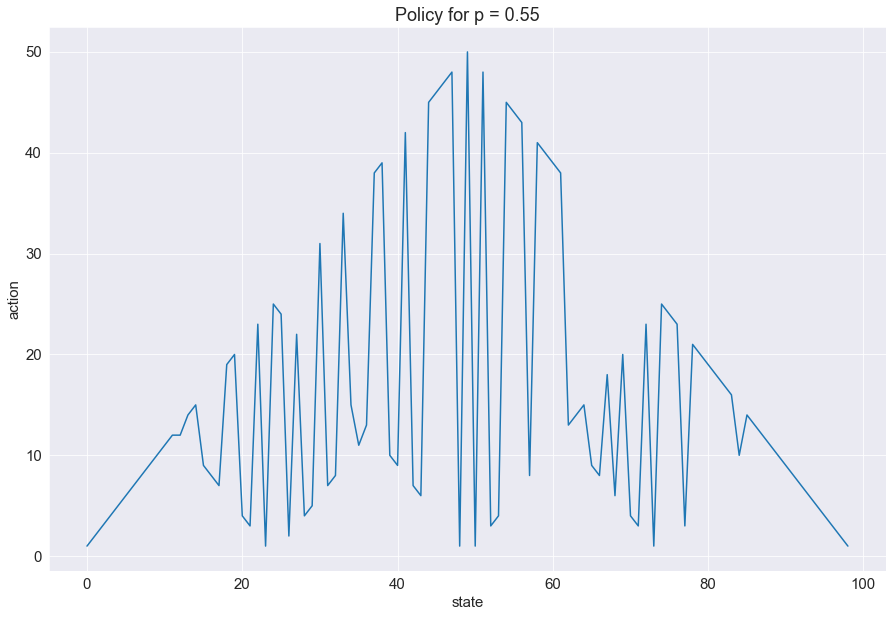

In [112]:
from random import sample

plt.figure(figsize = (15, 10))
# policy_actions = [v[0] for k, v in action_map.items()]
policy_actions = [sample(v, 1)[0] for k, v in action_map.items()]

plt_df = pd.DataFrame(
    list(zip(
        list(range(n)), 
        list(policy_actions[:n])
    )),
    columns = ['state', 'action']
)

sns.lineplot(data = plt_df, x = 'state', y = 'action').set_title(f'Policy for p = {p}')